In [12]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from matplotlib import pyplot
from sklearn import datasets
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
from statistics import mean, mode
import matplotlib.pyplot as plt


In [13]:
matrixDatasetTraintest =  [[[]*4 for j in range(19)] for i in range(10)]

In [14]:
DataMatrix = [ []*2 for i in range(10)]
for i in range(10):
    
    X, y = make_regression(n_samples=100, n_features=60, noise=40, n_informative=10)
    DataMatrix[i].extend((X, y))


In [15]:
listTestSize = np.arange(0.05, 1, 0.05).tolist()
listTestSize = [round(item, 2) for item in listTestSize]

In [16]:
matrixDatasetTraintest =  [[[]*4 for j in range(19)] for i in range(10)]
for i in range(10):
    for idx, x in enumerate(listTestSize):
        X_train, X_test, y_train, y_test = train_test_split(DataMatrix[i][0], DataMatrix[i][1], random_state=4, test_size=x, shuffle=True)
        matrixDatasetTraintest[i][idx].extend((X_train, X_test, y_train, y_test))

matrixDatasetTraintest

[[[array([[ 1.09246689, -0.30982897, -0.20154366, ..., -0.26345125,
           -1.71608195, -0.45253243],
          [ 1.06427431,  0.88491275, -0.96006245, ..., -2.09547545,
           -1.20326185, -0.95545504],
          [-0.79720226,  1.00361934,  0.46405798, ...,  0.58222407,
            1.80793632, -1.16313191],
          ...,
          [ 1.38130871,  0.64309748, -2.17062906, ...,  0.85815048,
           -1.46940375, -0.09268816],
          [ 0.435997  , -0.37195099, -1.1118457 , ..., -0.30034309,
            0.35446096,  0.68102838],
          [ 0.35441716,  0.08668563, -1.45452436, ...,  1.86365539,
            2.1280135 , -0.5942454 ]]),
   array([[-1.43889647, -0.52234777,  0.0169529 ,  1.11010474, -0.77481699,
           -1.61677182,  0.64564321, -0.22374695, -0.09514994, -0.34894564,
            1.33417118,  0.16203395,  0.33230464,  0.16662812, -2.04503119,
           -0.66762755,  0.63761297, -0.24368615,  1.24242235,  2.01105501,
           -2.28384499,  0.46718334, -0.947

<h1> Linear Regression </h1>

In [ ]:
lin_regressor = LinearRegression()

matrix_r2Scores = [ []*19 for i in range(10)]
for i in range(10):
    for particion in matrixDatasetTraintest[i]:
        lin_regressor.fit(particion[0], particion[2])
        y_pred = lin_regressor.predict(particion[1])
        matrix_r2Scores[i].append(r2_score(particion[3], y_pred))
    
matrix_r2ScoresInvertida = [ []*10 for i in range(19)]
for i in range(19):
    for j in range(10):
        matrix_r2ScoresInvertida[i].append(matrix_r2Scores[j][i])

list_meanr2Scores = []
for i in range(19):
    list_meanr2Scores.append(mean(matrix_r2ScoresInvertida[i]))
    
list_meanr2Scores

[0.7954797161904168,
 0.7942695579125475,
 0.7682954445528695,
 0.7472709034539045,
 0.61696329015949,
 0.5699433150168275,
 0.0801845518546466,
 -4.897860904682773,
 0.24047845064017342,
 0.4908118494467025,
 0.5170696648261157,
 0.5008851834045105,
 0.4504106065388422,
 0.3984178865509746,
 0.2839735753739009,
 0.24060124421765153,
 0.18047967188420017,
 -0.04645929658141319,
 -0.13026710281203802]

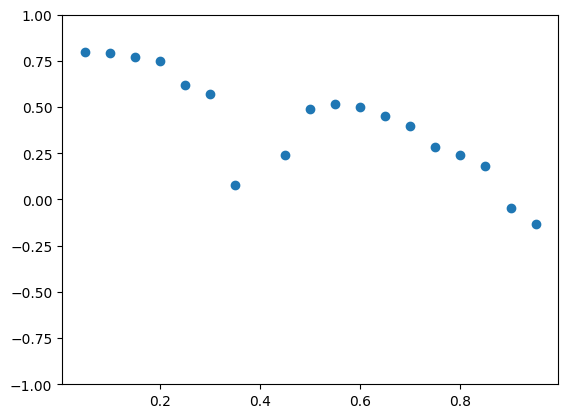

In [ ]:
f, ax = plt.subplots(1)
ax.set_ylim(ymin=-1)
plt.scatter(listTestSize, list_meanr2Scores)
plt.show(f)

<h1> Ridge Regression </h1>

In [ ]:
ridge = Ridge()
alpha_list ={'alpha':np.logspace(-5, 5, num=11, base=10)}
ridge_regressor = GridSearchCV(ridge,alpha_list,cv=5)

matrix_bestParams = [ []*19 for i in range(10)]
matrix_r2Scores = [ []*19 for i in range(10)]
for i in range(10):
    for particion in matrixDatasetTraintest[i]:
        ridge_regressor.fit(particion[0], particion[2])
        y_pred = ridge_regressor.predict(particion[1])
        matrix_r2Scores[i].append(r2_score(particion[3], y_pred))
        matrix_bestParams[i].append(ridge_regressor.best_params_['alpha'])

    
matrix_r2ScoresInvertida = [ []*10 for i in range(19)]
for i in range(19):
    for j in range(10):
        matrix_r2ScoresInvertida[i].append(matrix_r2Scores[j][i])

list_meanr2Scores = []
for i in range(19):
    list_meanr2Scores.append(mean(matrix_r2ScoresInvertida[i]))
    
list_meanr2Scores

matrix_bestParamsInvertida = [ []*10 for i in range(19)]
for i in range(19):
    for j in range(10):
        matrix_bestParamsInvertida[i].append(matrix_bestParams[j][i])

list_meanParams = []
for i in range(19):
    list_meanParams.append(mode(matrix_bestParamsInvertida[i]))

list_meanParams


d:\Universidad\TFG\Codigo\codigo-env\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
d:\Universidad\TFG\Codigo\codigo-env\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
d:\Universidad\TFG\Codigo\codigo-env\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
d:\Universidad\TFG\Codigo\codigo-env\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
d:\Universidad\TFG\Codigo\codigo-env\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is 

[1.0,
 1.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 1.0,
 1.0,
 10.0,
 10.0,
 10.0,
 1e-05,
 10.0,
 1e-05,
 1e-05,
 100000.0,
 1e-05]

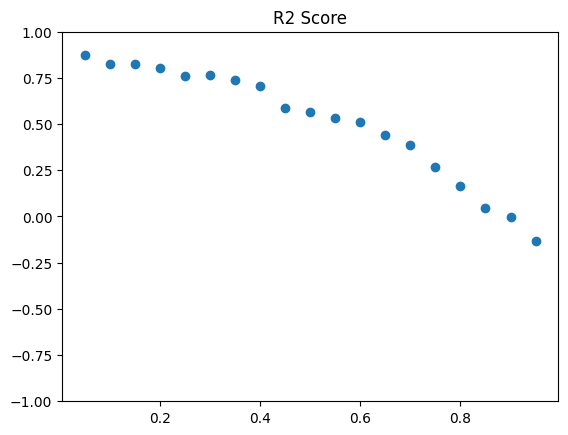

In [ ]:
f, ax = plt.subplots(1)
ax.set_ylim(ymin=-1)
plt.title("R2 Score")
plt.scatter(listTestSize, list_meanr2Scores)
plt.show(f)

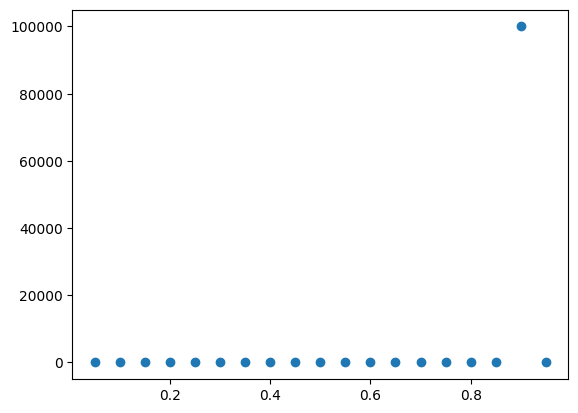

In [ ]:
f, ax = plt.subplots(1)
plt.scatter(listTestSize, list_meanParams)
plt.show(f)

<h1> Lasso Regression </h1>

In [ ]:
lasso = Lasso()
alpha_list ={'alpha':np.logspace(-5, 10, num=15, base=10)}
lasso_regressor = GridSearchCV(lasso,alpha_list,cv=5)

matrix_bestParams = [ []*19 for i in range(10)]
matrix_r2Scores = [ []*19 for i in range(10)]
for i in range(10):
    for particion in matrixDatasetTraintest[i]:
        lasso_regressor.fit(particion[0], particion[2])
        y_pred = lasso_regressor.predict(particion[1])
        matrix_r2Scores[i].append(r2_score(particion[3], y_pred))
        matrix_bestParams[i].append(lasso_regressor.best_params_['alpha'])

    
matrix_r2ScoresInvertida = [ []*10 for i in range(19)]
for i in range(19):
    for j in range(10):
        matrix_r2ScoresInvertida[i].append(matrix_r2Scores[j][i])

list_meanr2Scores = []
for i in range(19):
    list_meanr2Scores.append(mean(matrix_r2ScoresInvertida[i]))
    
list_meanr2Scores

matrix_bestParamsInvertida = [ []*10 for i in range(19)]
for i in range(19):
    for j in range(10):
        matrix_bestParamsInvertida[i].append(matrix_bestParams[j][i])

list_meanParams = []
for i in range(19):
    list_meanParams.append(mode(matrix_bestParamsInvertida[i]))

list_meanParams


d:\Universidad\TFG\Codigo\codigo-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.114e+02, tolerance: 2.708e+02
  model = cd_fast.enet_coordinate_descent(
d:\Universidad\TFG\Codigo\codigo-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.845e+03, tolerance: 2.254e+02
  model = cd_fast.enet_coordinate_descent(
d:\Universidad\TFG\Codigo\codigo-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

KeyboardInterrupt: 

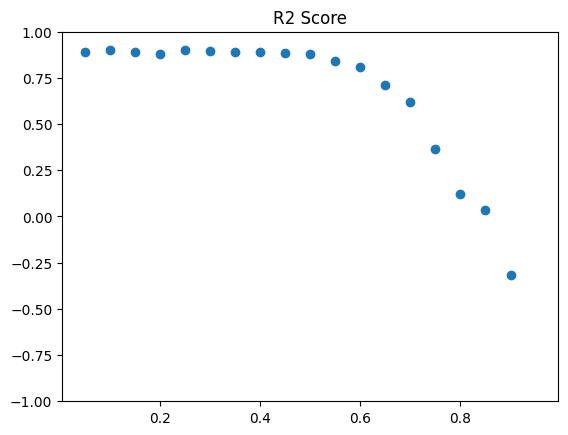

In [ ]:
f, ax = plt.subplots(1)
ax.set_ylim(ymin=-1)
plt.title("R2 Score")
plt.scatter(listTestSize, list_meanr2Scores)
plt.show(f)

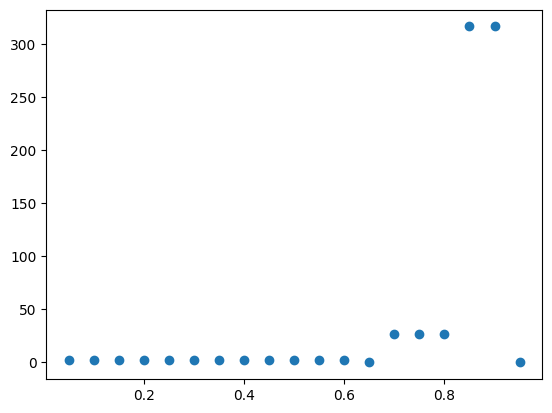

In [ ]:
f, ax = plt.subplots(1)
plt.scatter(listTestSize, list_meanParams)
plt.show(f)